In [1]:
from random import random, sample
import numpy as np

from astropy import coordinates
from astropy.io import fits
from astroquery.mast import Observations
from astropy.table import vstack, Table

import matplotlib.pyplot as plt
from PIL import Image

import sys
import os
import time
import re
import json
 
import requests
from urllib.parse import quote as urlencode

In [9]:
#Legacy
%run 2204A_Arşiv_Ayıklama.ipynb
#Legacy

In [10]:
%run 2204A_Arşiv_Tarama.ipynb

In [11]:
%run 2204A_Görüntü_Alma.ipynb

In [27]:
%run 2204A_Görüntü_İşleme_Hubble.ipynb

In [13]:
%run 2204A_Koordinat_Oluşturma.ipynb

In [14]:
%run 2204A_Veri_İndirme.ipynb

In [15]:
%run 2204A_Bölütleri_Bozma.ipynb

In [11]:
coords = generate_coords(100)
coords 


[<SkyCoord (ICRS): (ra, dec) in deg
     (17.77652335, -62.82889796)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (228.29845336, -53.3106054)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (200.84458359, -65.29071268)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (228.59468312, 74.77442168)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (312.28971307, -43.03866538)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (106.8586027, 36.43932798)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (167.22861792, 10.88401318)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (333.92161419, 89.19563302)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (265.62365593, -1.92955303)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (192.03197807, -73.93943115)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (161.43162507, 15.58636909)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (190.78786521, 75.17532941)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (150.8270547, 52.38289617)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (334.58634136, 30.18555368)>,
 <Sky

In [15]:
table = query_hubble(coords)

4
0
19
1
212
2
212
3
231
4
248
5
333
6
362
7
515
8
518
9
933
10
1100
11
1204
12
1214
13
1222
14
1242
15
1245
16
1679
17
1694
18
1744
19
1746
20


Gözlem verisi yok!
21
2077
22
2079
23
2085
24
2162
25
Gözlem verisi yok!
26
2162
27
2164
28
2267
29
2294
30
2323
31
2329
32
2385
33
2397
34
2429
35
2853
36
2874
37
2892
38
2976
39
2980
40
2982
41
2982
42
3226
43
3256
44
3382
45
3504
46
3544
47
3570
48
3576
49
3688
50
3730
51
3955
52
3969
53
4052
54
4065
55
4076
56
4186
57
4237
58
4241
59
4251
60
4297
61
4311
62
Gözlem verisi yok!
63
4356
64
4368
65
4415
66
4415
67
4485
68
4512
69
4535
70
4560
71
4560
72
4596
73
4610
74
4612
75
4877
76
4946
77
4948
78
Gözlem verisi yok!
79
4976
80
4983
81
4996
82
5731
83
5757
84
5791
85
6528
86
8880
87
Gözlem verisi yok!
88
8928
89
8932
90
9250
91
9271
92
Gözlem verisi yok!
93
9286
94
9298
95
9298
96
9445
97
9478
98
9541
99


In [23]:
download_the_data(table, "D:")

INFO: 5328 of 9541 products were duplicates. Only downloading 4213 unique product(s). [astroquery.mast.observations]



KeyboardInterrupt



In [17]:
table

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters
str9,str3,str7,str48,str67,str1,str98,str9,str28,str11,str1,str8,str22,str5,str58,int64,str9,str6,int64,str27
24838726,HST,image,jccd06010,DADS DRZ file - Calibrated combined image ACS/WFC3/WFPC2/STIS,D,mast:HST/product/jccd06010_drz.fits,SCIENCE,Minimum Recommended Products,DRZ,--,CALACS,DrizzlePac 3.6.2,13412,jccd06010_drz.fits,224674560,24838726,PUBLIC,3,F606W
24838726,HST,image,jccd06010,DADS DRZ file - Calibrated combined image ACS/WFC3/WFPC2/STIS,D,mast:HST/product/jccd06010_drz.fits,SCIENCE,Minimum Recommended Products,DRZ,--,CALACS,DrizzlePac 3.6.2,13412,jccd06010_drz.fits,224674560,26463116,PUBLIC,3,F606W
83341374,HST,image,iepo2p010,DADS DRZ file - Calibrated combined image ACS/WFC3/WFPC2/STIS,D,mast:HST/product/iepo2p010_drz.fits,SCIENCE,Minimum Recommended Products,DRZ,--,CALWF3,3.7.1 (Oct-18-2023),16741,iepo2p010_drz.fits,217673280,83341374,PUBLIC,3,F275W
83341374,HST,image,iepo2p010,DADS DRZ file - Calibrated combined image ACS/WFC3/WFPC2/STIS,D,mast:HST/product/iepo2p010_drz.fits,SCIENCE,Minimum Recommended Products,DRZ,--,CALWF3,3.7.1 (Oct-18-2023),16741,iepo2p010_drz.fits,217673280,83342070,PUBLIC,3,F275W
23819879,HST,image,ib1b92lrq,DADS DRZ file - Calibrated combined image ACS/WFC3/WFPC2/STIS,S,mast:HST/product/ib1b92lrq_drz.fits,SCIENCE,Minimum Recommended Products,DRZ,--,CALWF3,3.7.1 (Oct-18-2023),11657,ib1b92lrq_drz.fits,3435840,23819879,PUBLIC,3,F814W
23819879,HST,image,ib1b92lrq,DADS DRZ file - Calibrated combined image ACS/WFC3/WFPC2/STIS,S,mast:HST/product/ib1b92lrq_drz.fits,SCIENCE,Minimum Recommended Products,DRZ,--,CALWF3,3.7.1 (Oct-18-2023),11657,ib1b92lrq_drz.fits,3435840,26506153,PUBLIC,3,F814W
24795493,HST,image,ib1b92020,DADS DRZ file - Calibrated combined image ACS/WFC3/WFPC2/STIS,D,mast:HST/product/ib1b92020_drz.fits,SCIENCE,Minimum Recommended Products,DRZ,--,CALWF3,3.7.1 (Oct-18-2023),11657,ib1b92020_drz.fits,3438720,24795493,PUBLIC,3,F200LP
24795493,HST,image,ib1b92020,DADS DRZ file - Calibrated combined image ACS/WFC3/WFPC2/STIS,D,mast:HST/product/ib1b92020_drz.fits,SCIENCE,Minimum Recommended Products,DRZ,--,CALWF3,3.7.1 (Oct-18-2023),11657,ib1b92020_drz.fits,3438720,26506130,PUBLIC,3,F200LP
24795494,HST,image,ib1b92030,DADS DRZ file - Calibrated combined image ACS/WFC3/WFPC2/STIS,D,mast:HST/product/ib1b92030_drz.fits,SCIENCE,Minimum Recommended Products,DRZ,--,CALWF3,3.7.1 (Oct-18-2023),11657,ib1b92030_drz.fits,3438720,24795494,PUBLIC,3,F350LP


In [20]:
np.sum(np.array(table["size"]))

1805268337920

In [9]:
img = get_image_from_fits("C:\\Users\\hp\\Desktop\\04A\\İşlenmemiş\\eski\\jckz03010_drz.fits")

In [44]:
secs = process_image_hubble(img, 512)

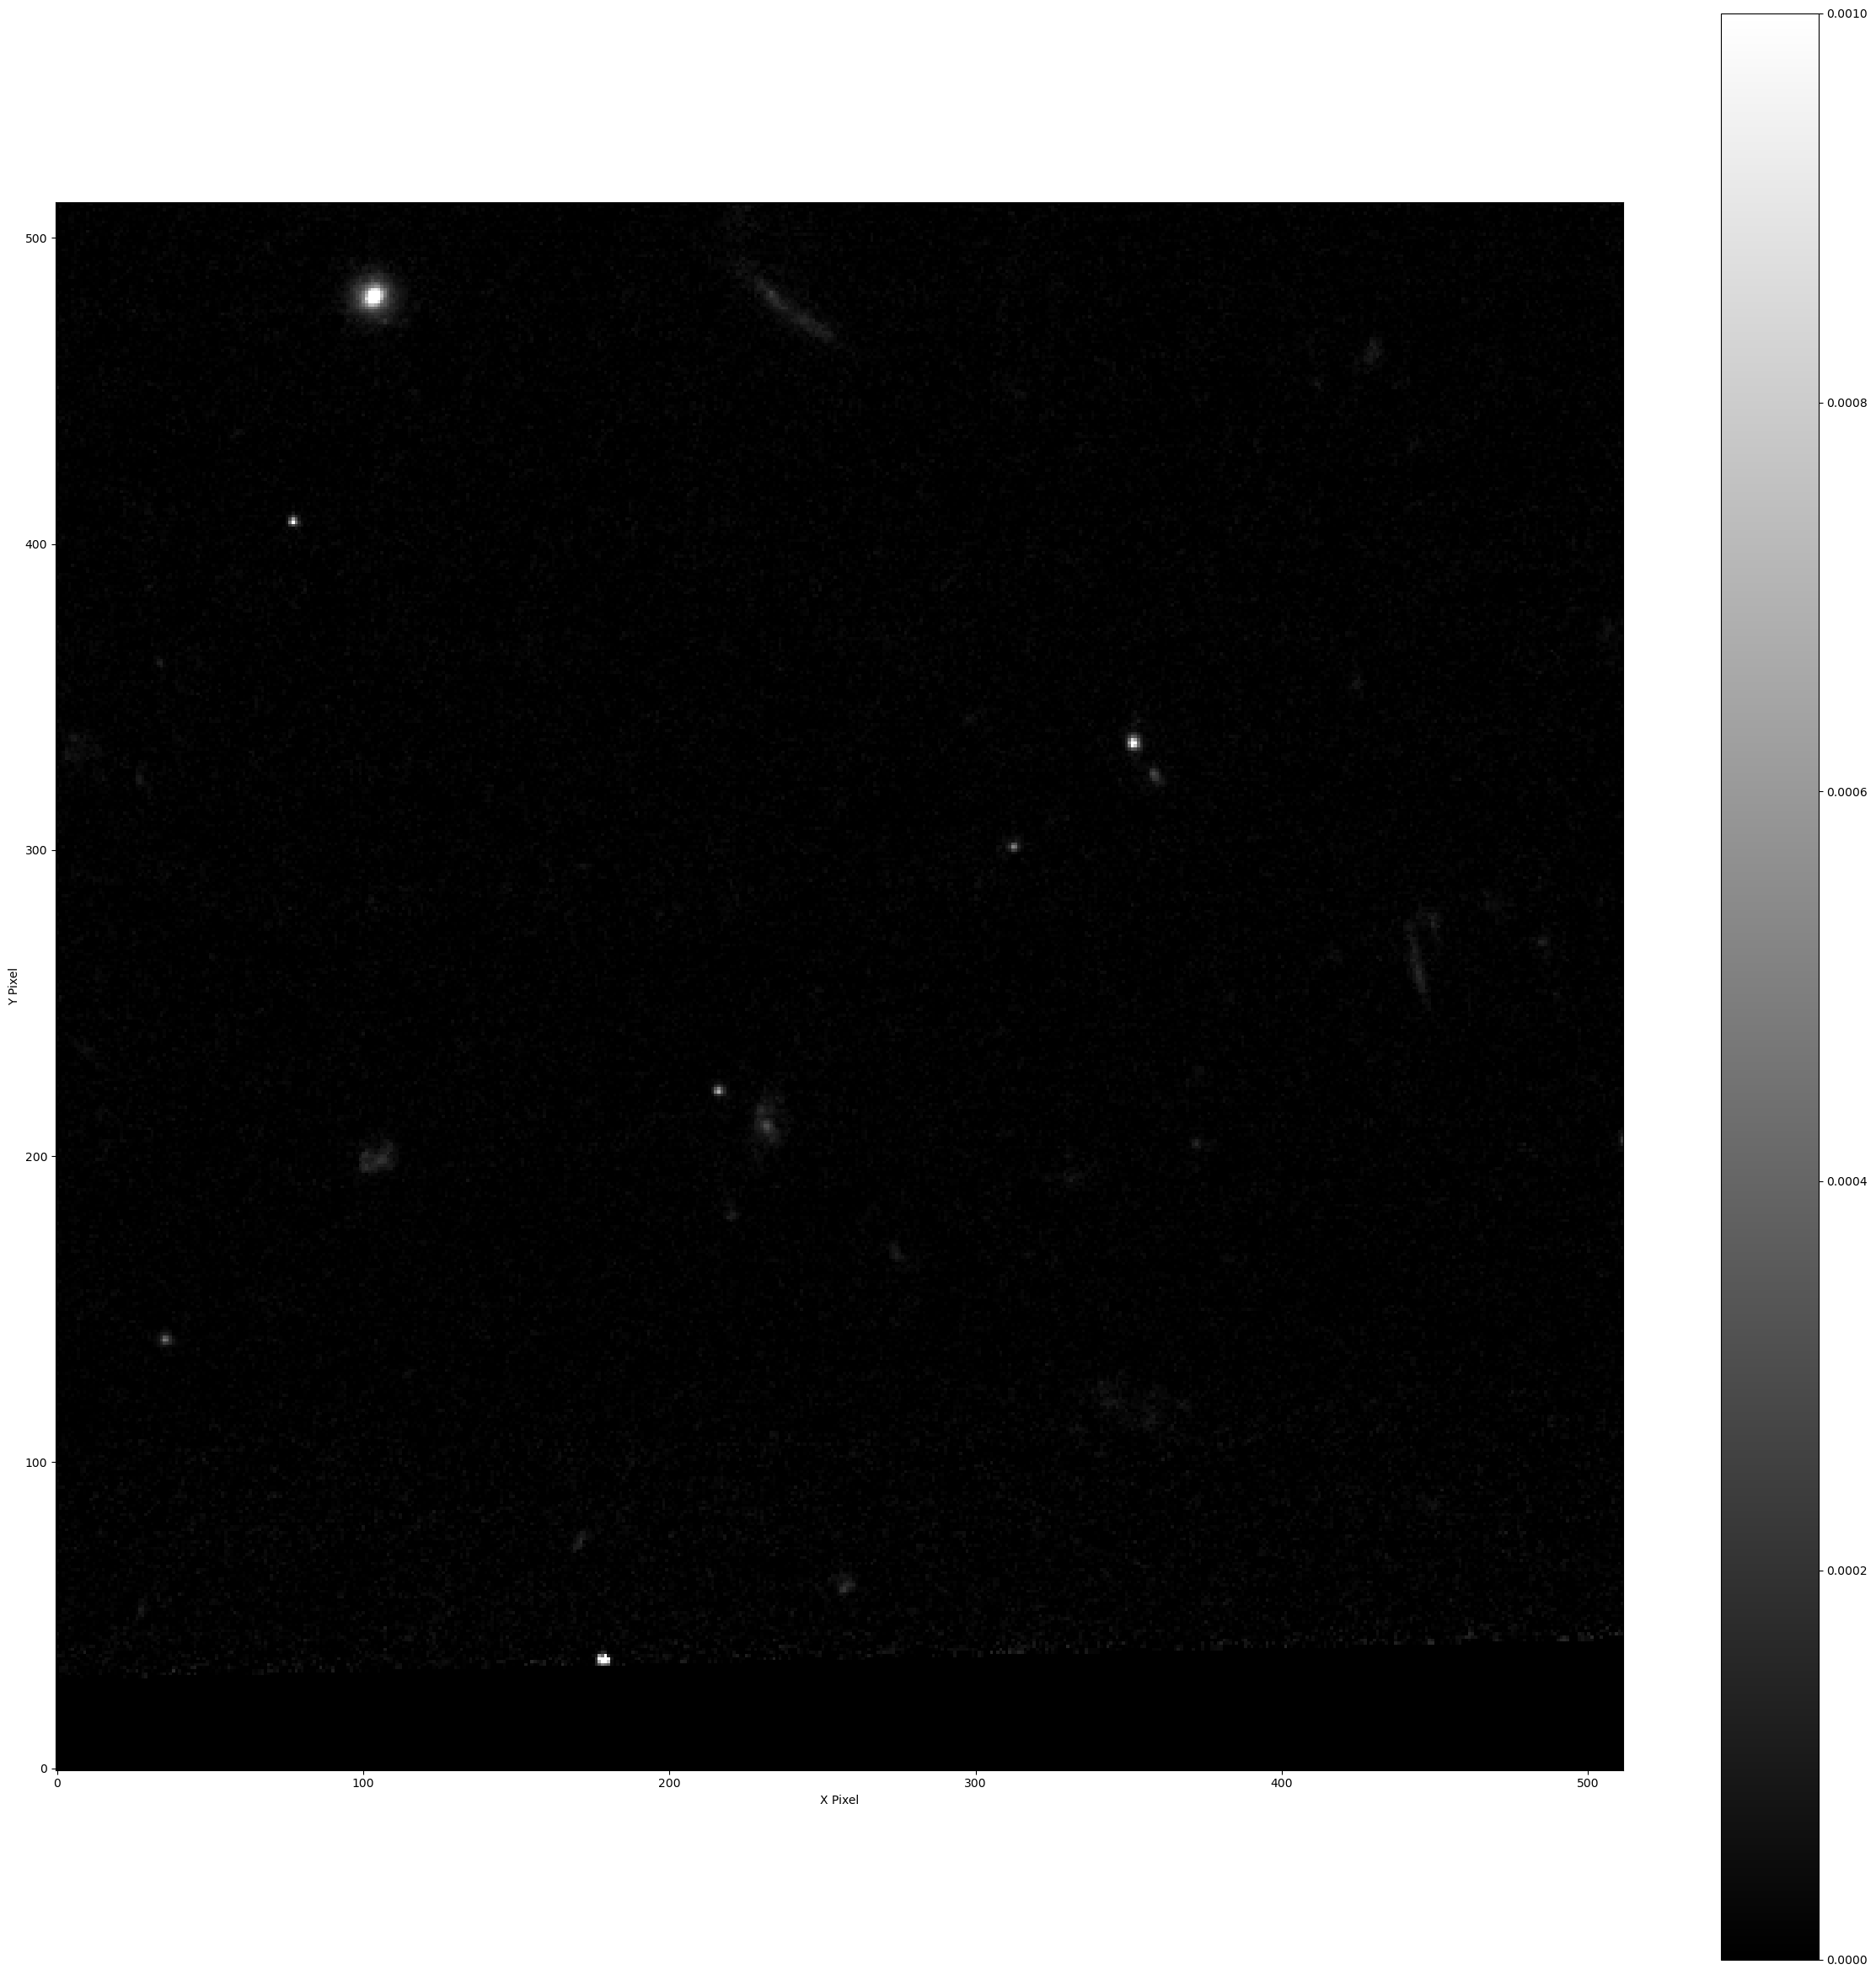

In [95]:
nrm = secs[2]


plt.figure(figsize=(30,30))
plt.imshow(nrm, cmap='gray', origin='lower', vmin=0, vmax=0.001)
plt.colorbar()
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()

0.008015536
3


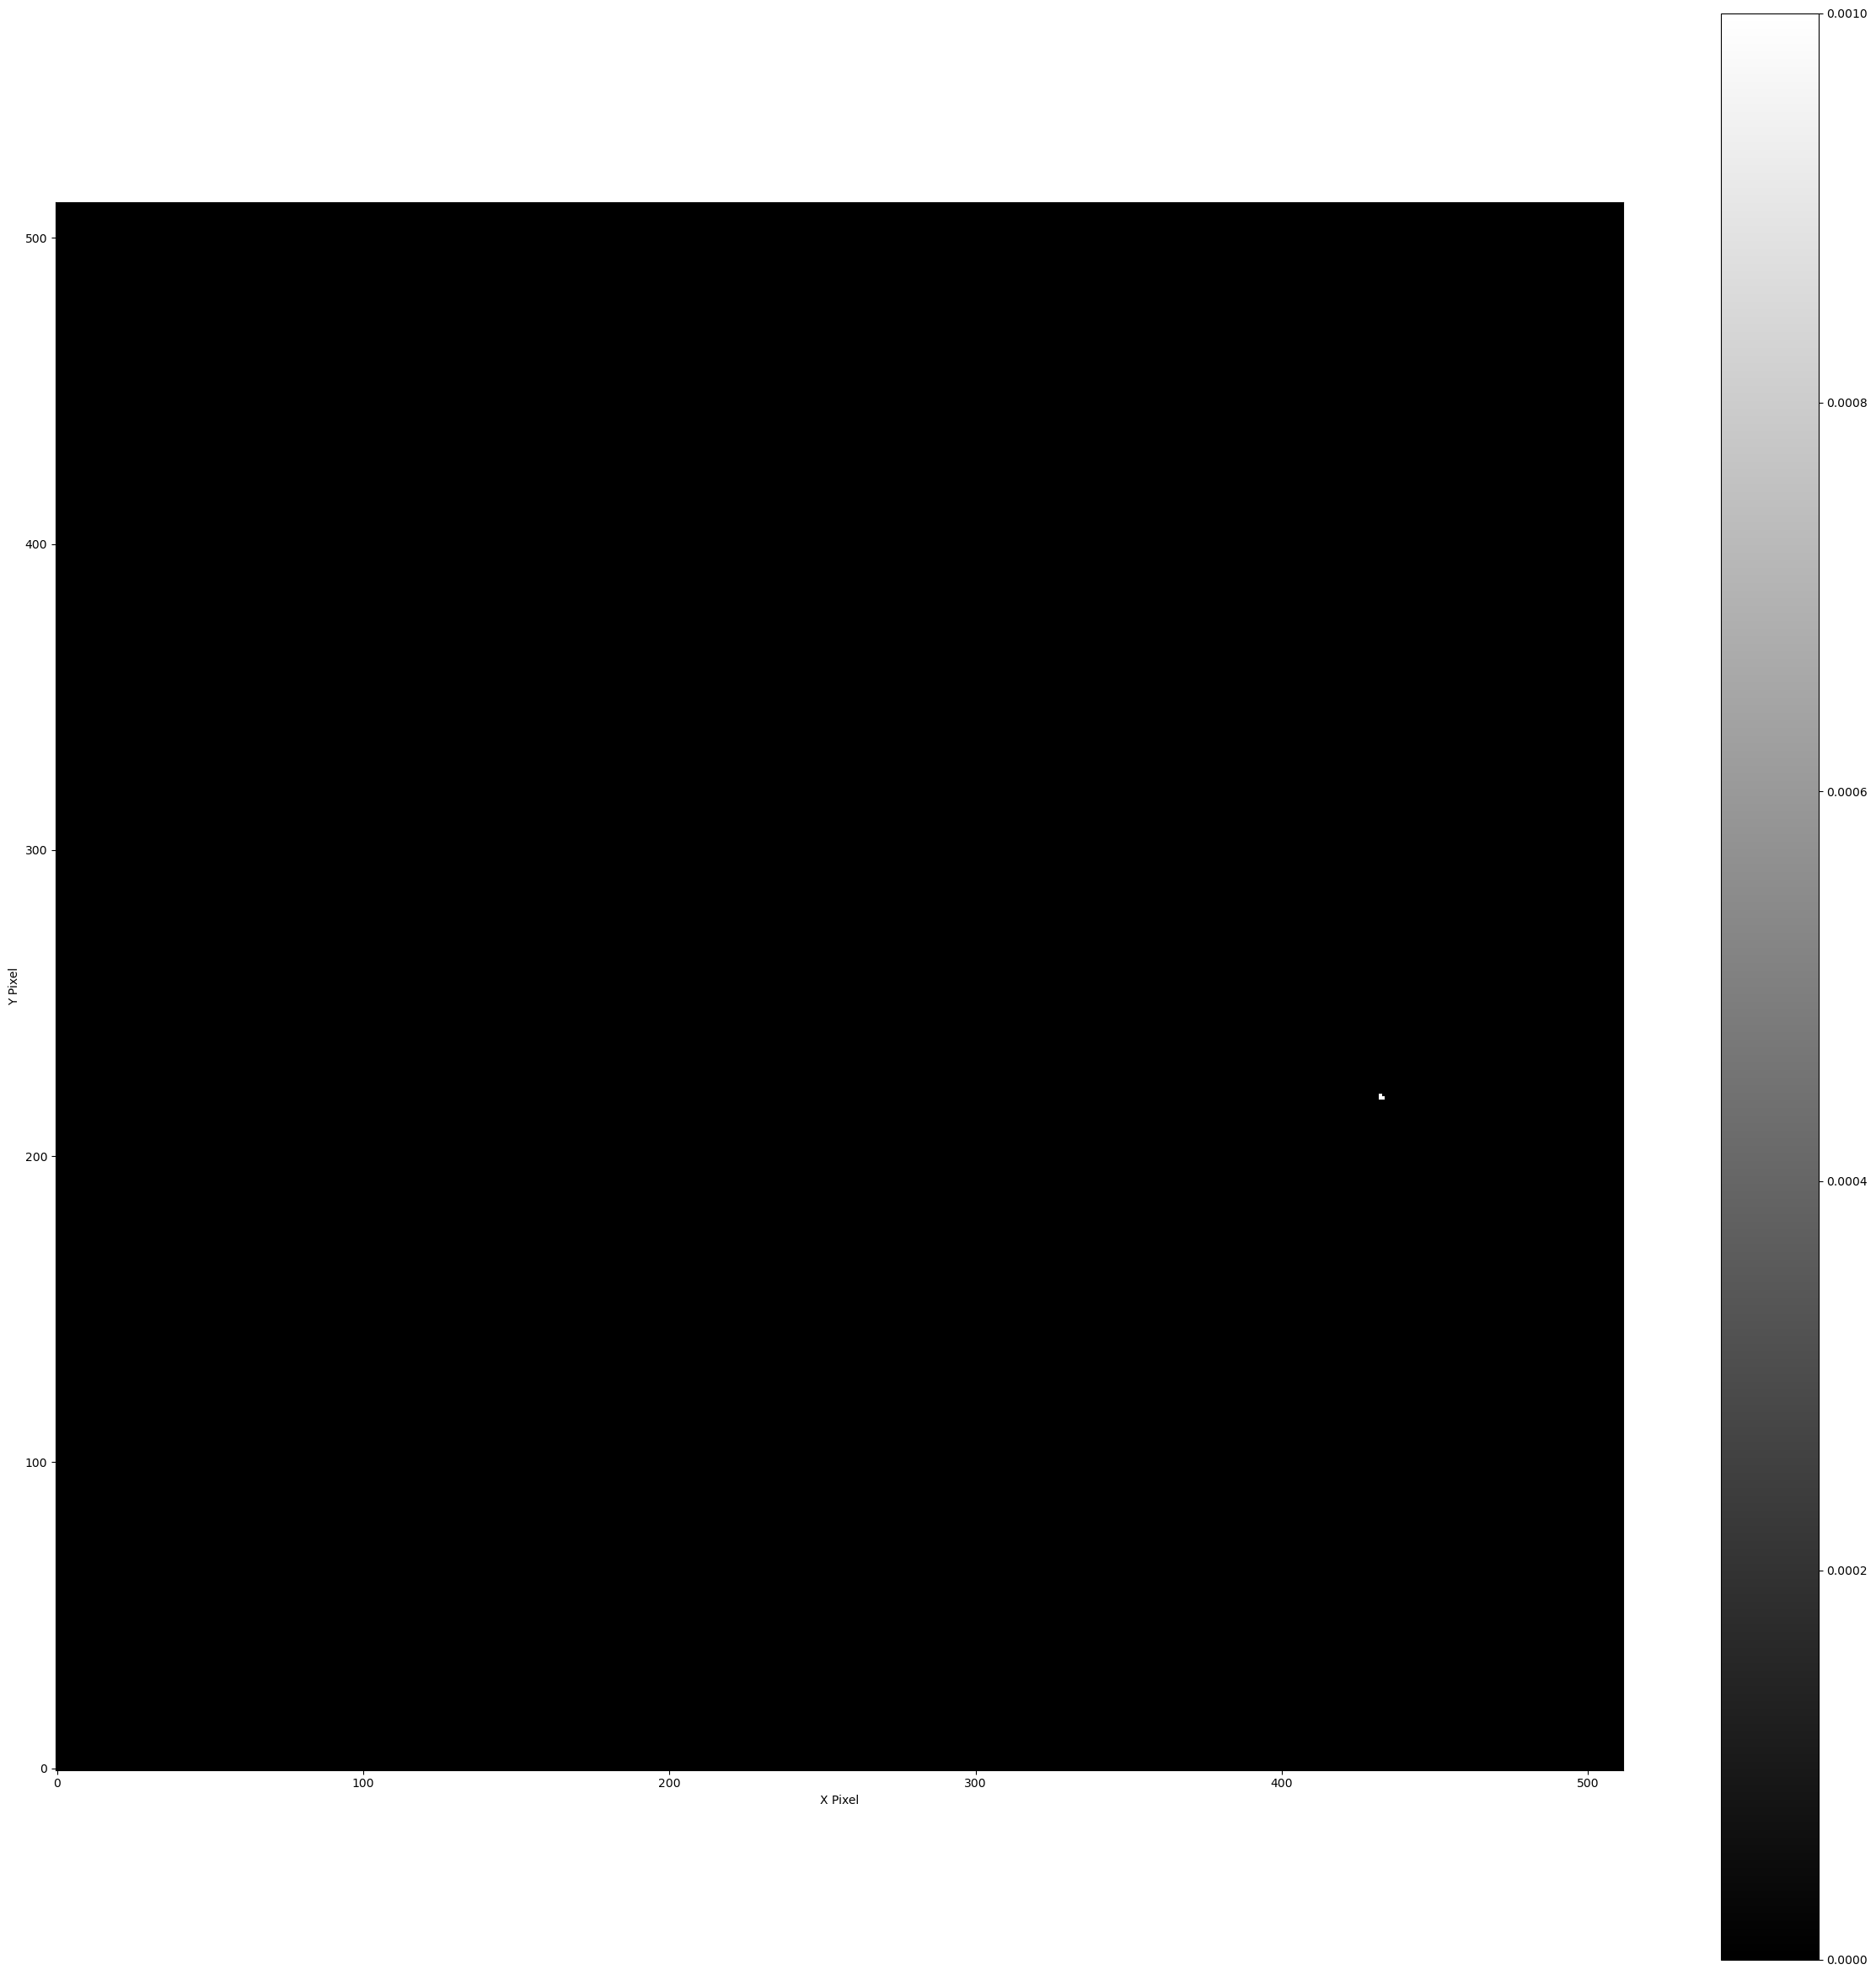

In [94]:
nrm = secs[22]
half = np.max(nrm)
print(half)
half /= 2
nrm[nrm < half] = 0
nrm = nrm * 1e9
print((512*512) - np.sum(np.array(nrm == 0, dtype = np.int8)))

plt.figure(figsize=(30,30))
plt.imshow(nrm, cmap='gray', origin='lower', vmin=0, vmax=0.001)
plt.colorbar()
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()

In [19]:
psf = airy_disk_psf(512, 550e-9, 1.5)

C:\Users\hp\AppData\Local\Temp\ipykernel_12684\3654135897.py:15: RuntimeWarning: invalid value encountered in divide
  psf = (2 * jn(1, k * r * aperture_diameter / 2) / (k * r * aperture_diameter / 2))**2


0.0019766302407573278
10


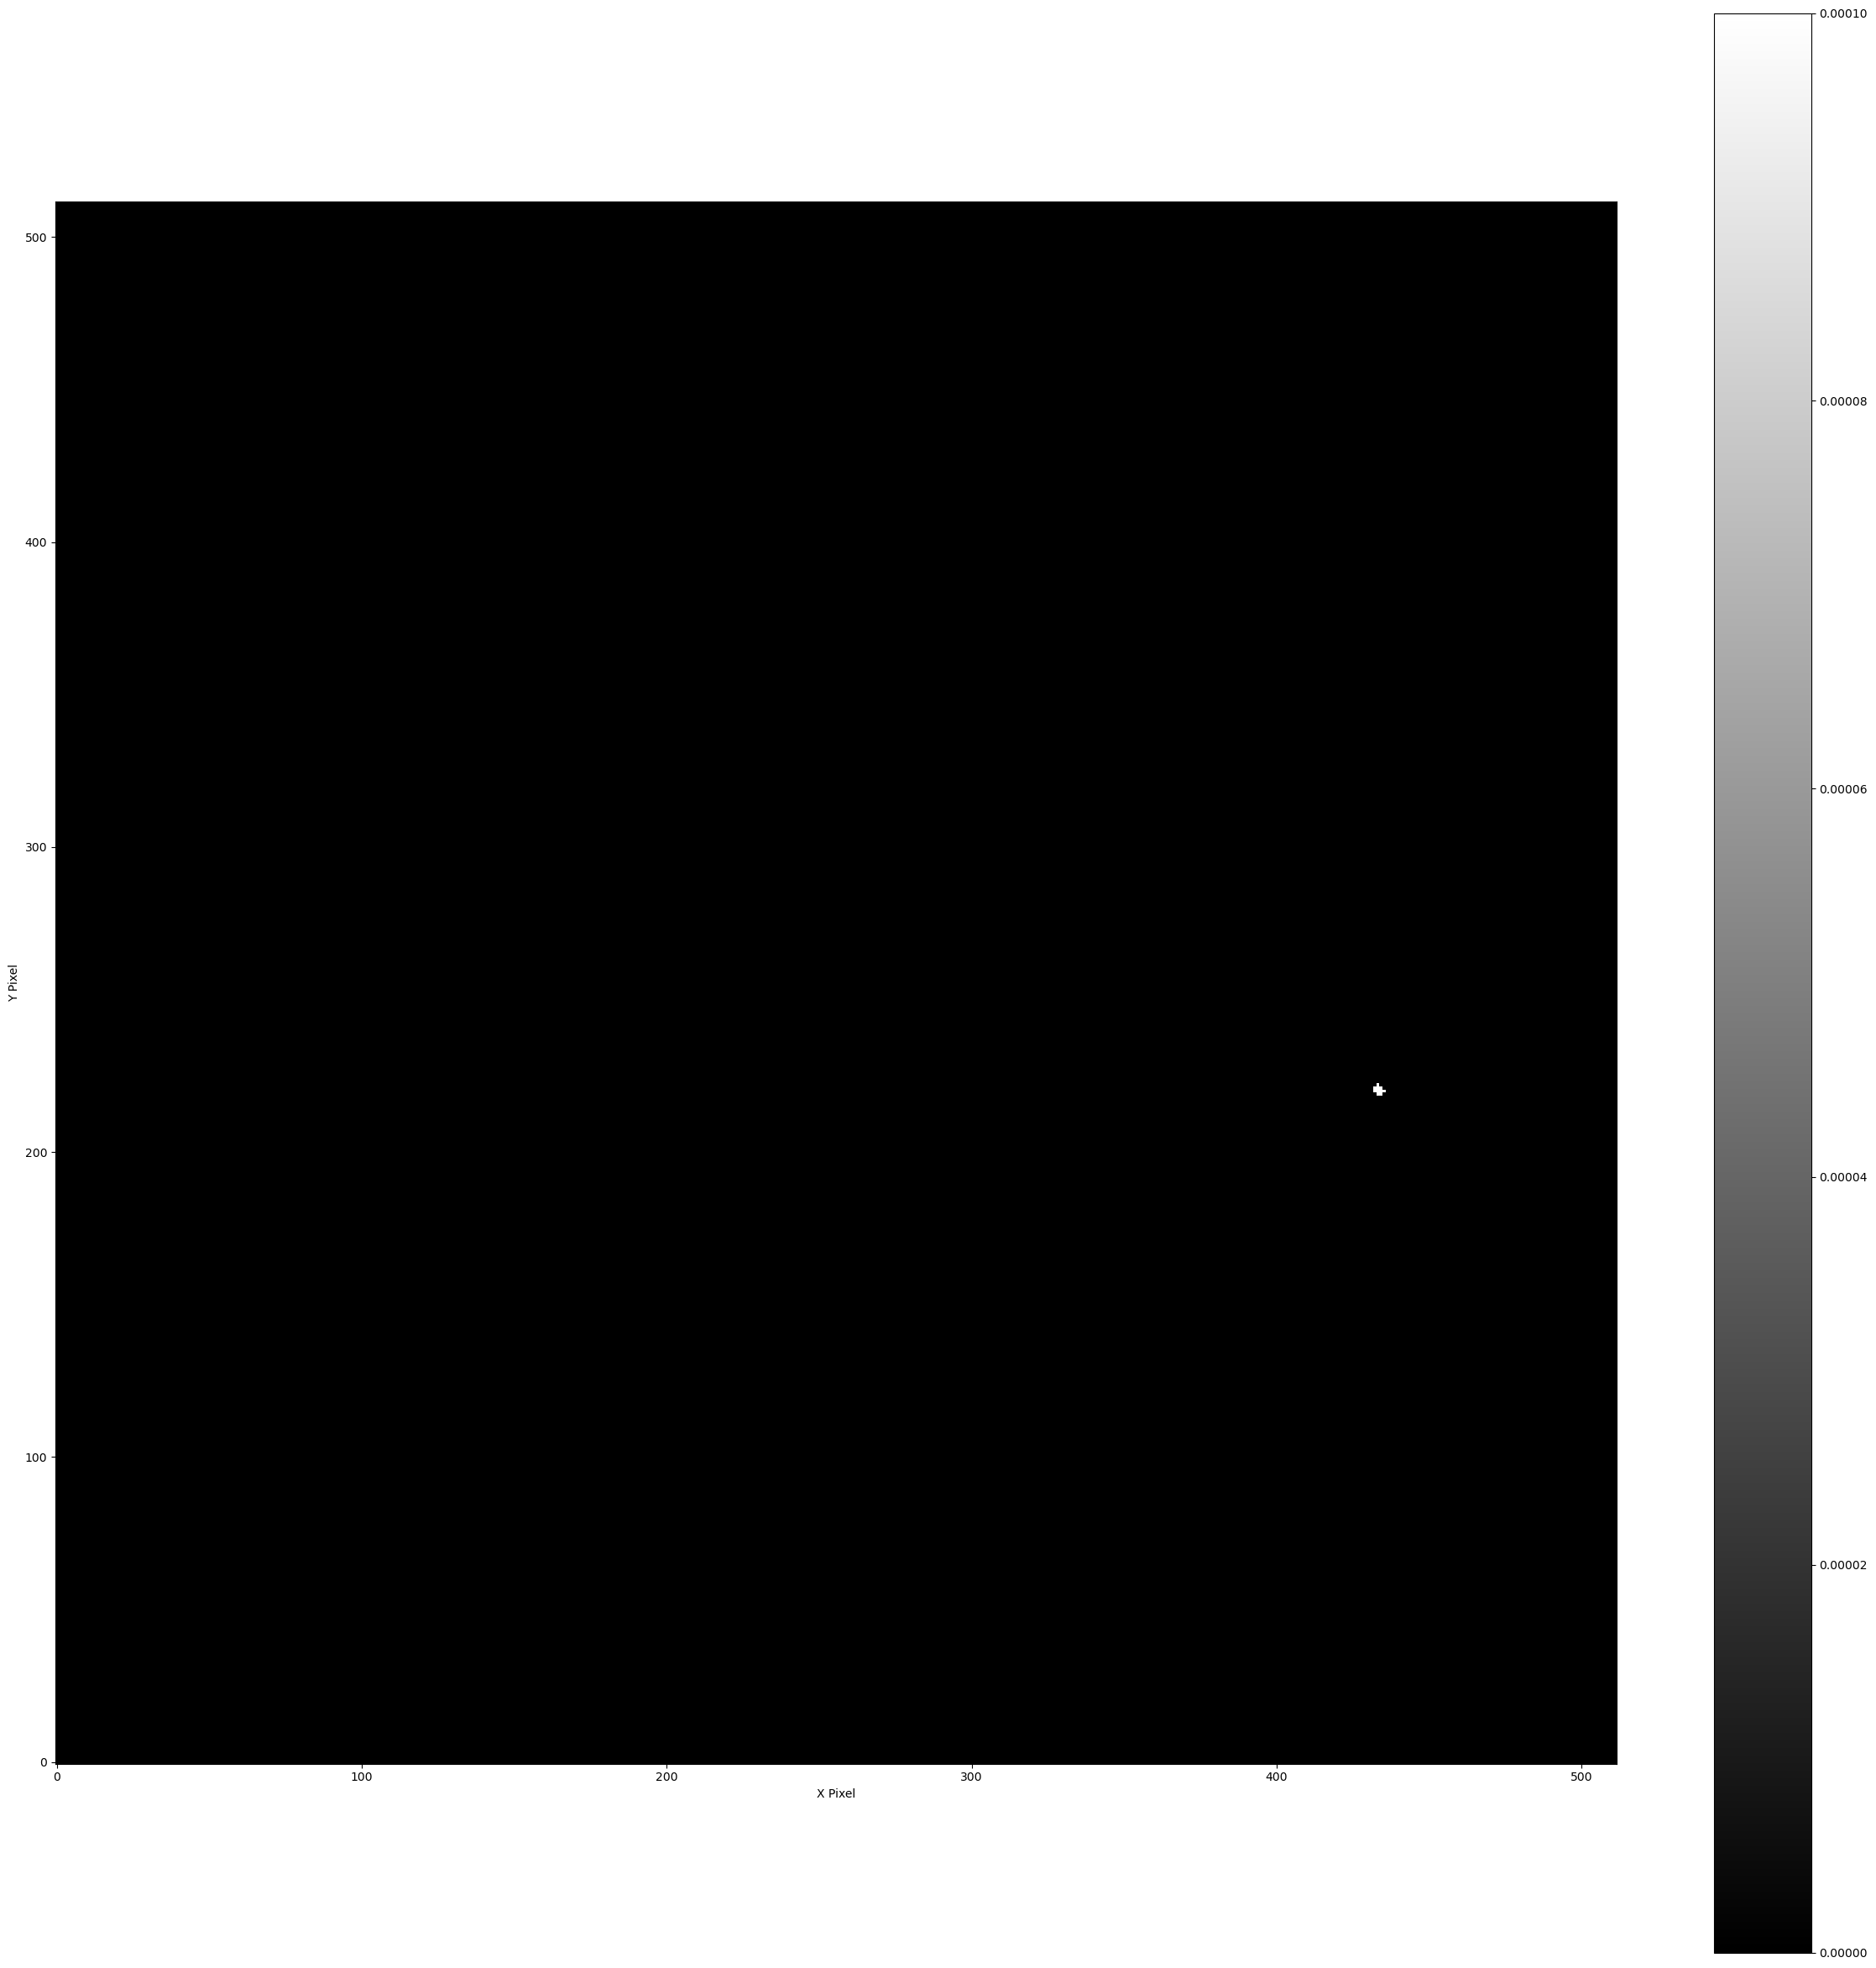

In [97]:
dst = distort(secs[22], psf)
half = np.max(dst)
print(half)
half/=2
dst[dst<half] = 0
dst = dst*1e9

print((512*512) - np.sum(np.array(dst == 0, dtype = np.int8)))

plt.figure(figsize=(30,30))
plt.imshow(dst, cmap='gray', origin='lower', vmin=0, vmax=0.0001)
plt.colorbar()
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()

In [99]:
tug = get_image_from_fits("C:\\Users\\hp\\Desktop\\04A\\TUG\\915\\Image\\2017-05-03\\T100_915_DATE_2017-05-03_TIME_23.42.30.99_light.fit")
tsecs = process_image_hubble(tug, 512)
tsecs.shape

(16, 512, 512)

0.14165922232670192
15


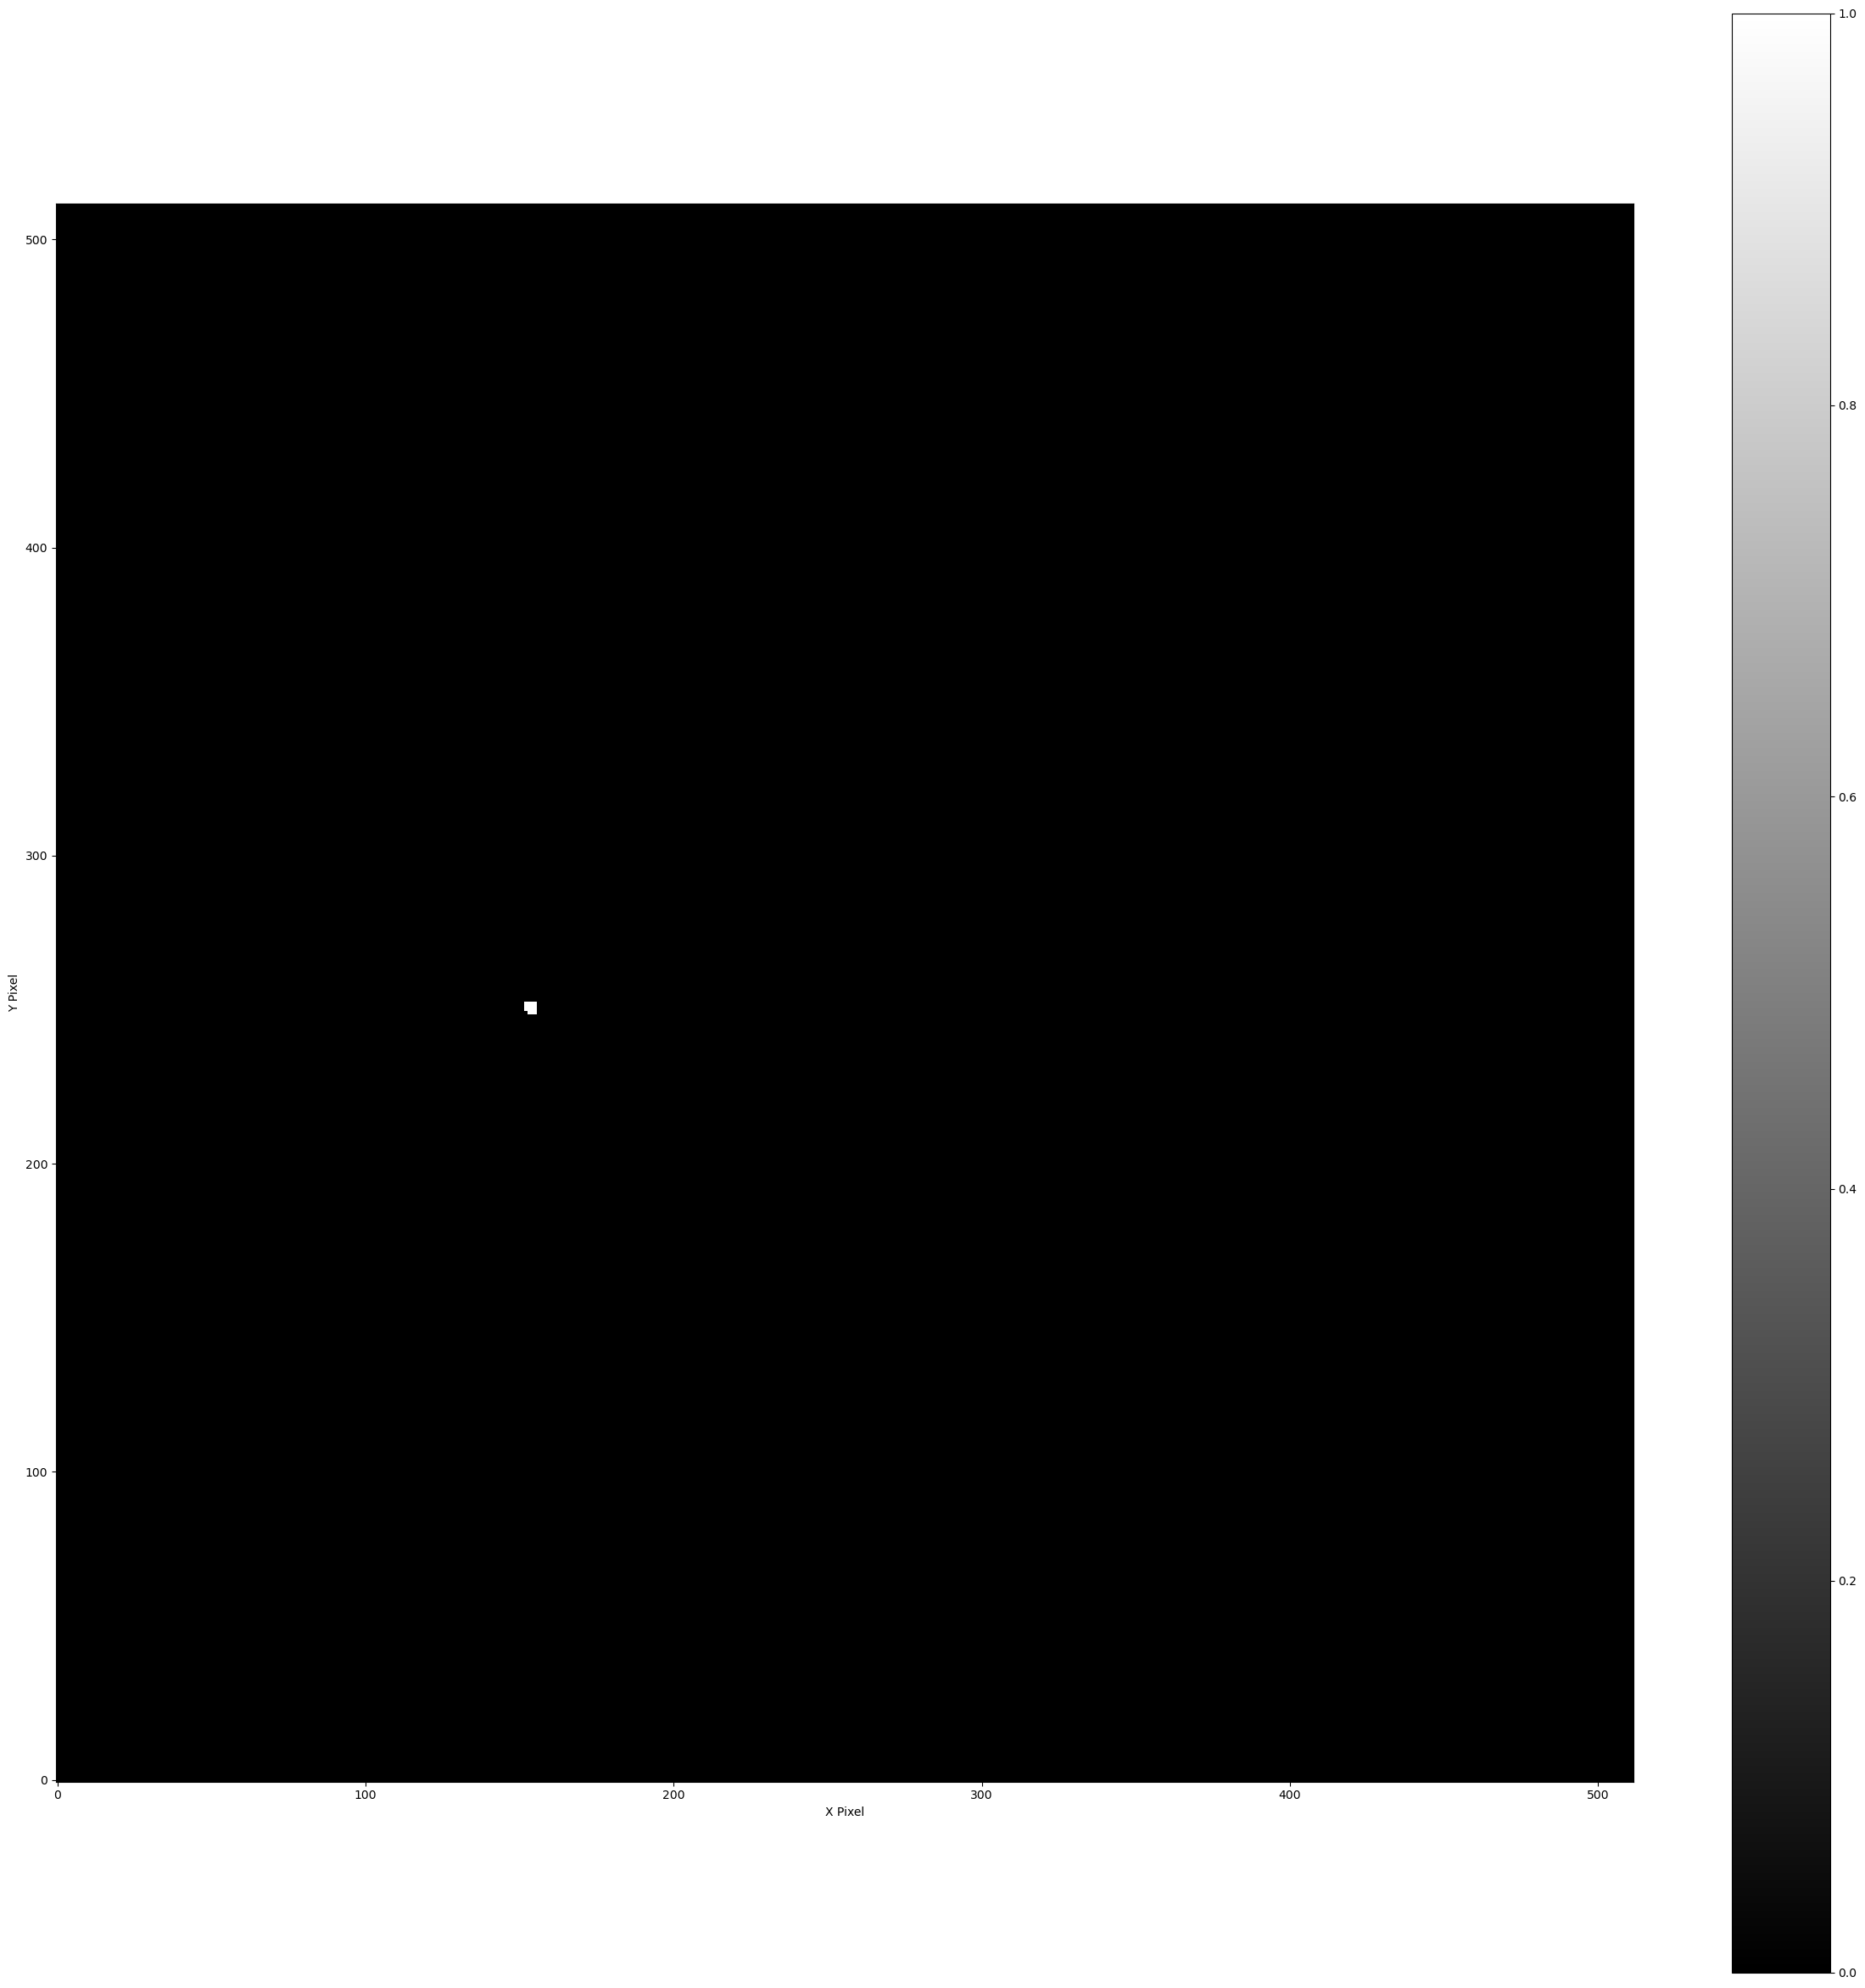

In [105]:
dst = distort(tsecs[10], psf)
half = np.max(dst)
print(half)
half/=2
dst[dst<half] = 0
dst = dst*1e9

print((512*512) - np.sum(np.array(dst == 0, dtype = np.int8)))

plt.figure(figsize=(30,30))
plt.imshow(dst, cmap='gray', origin='lower', vmin=0, vmax=1)
plt.colorbar()
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()

In [32]:
directory_path= "C:\\Users\\hp\\Desktop\\04A\\TUG\\915\\Image\\2017-05-03"

for filename in os.listdir(directory_path):
    if filename.endswith(".fit"):
        
        file_path = os.path.join(directory_path, filename)

        """if os.path.isfile("E:\\YAD\\YAD_İşlenmiş_TUG\\" + filename + "sec0.npy"):
            print("*")
            continue"""
        
        try:
            img = get_image_from_fits(file_path)
            
        except:
            continue

        secs = None
        try:
            print("*")
            secs = process_image_hubble(img, 512)
            
        except:
            continue
        
        if type(secs) != np.ndarray:            
            continue
        
        distort_sections(secs, filename, "E:\\YAD\\YAD_İşlenmiş_TUG\\")
        

*
63721
34535
1802
4689
3142
9682
11496
809
31942
7330
1174
2359
63792
347
4969
7495
*
63682
1255
5039
4575
11952
2450
29969
6406
63691
19994
2959
8077
64139
7356
1815
28515
*
63726
293
2872
4237
42418
8767
11318
3252
3284
2117
17164
15964
5542
63741
65347
64622
*
63698
4376
3230
5509
30592
2687
2999
4626
19552
3964
7030
3616
1539
28696
3502
11058
*
63693
1079
4573
4076
9962
2137
27889
3675
63683
19801
6339
6109
64061
26432
3376
21007
*
63707
3422
2491
4680
22897
12608
36481
4119
17024
2184
5906
3309
1403
25680
3170
9075
*
63690
6614
2178
8004
43032
3450
963
7310
28965
3128
11124
5646
5077
43492
5230
15903
*
63711
11769
3137
12467
61797
4432
1246
10274
47600
8472
15066
8831
3852
63740
8135
23507
*
63700
8574
2853
11232
56209
4208
7002
8372
34615
3054
16944
6855
2802
51309
6718
19823
*
63698
5946
6975
12442
37100
3468
4268
5800
23769
2372
15720
4662
4770
39005
4696
13356
*
63712
10782
3678
14097
63627
5267
4473
11365
45753
4049
19791
8223
3362
63737
9118
26348
*
63736
9206
2451
9967
479

C:\Users\hp\AppData\Local\Temp\ipykernel_1352\3139166199.py:35: RuntimeWarning: invalid value encountered in divide
  new = new/max


*
63700
11930
3548
13213
63642
7005
8676
10192
42348
4518
21152
8676
2941
63754
10655
26311
*
63695
8610
3152
11406
61308
4390
1136
10815
42811
3221
12990
7366
3372
59132
6885
21370
*
63696
10136
3230
13908
63649
4620
4659
10180
47590
3563
16341
8419
3839
63735
8264
23776
*
63704
11277
3284
13220
62760
6235
1597
10277
37004
4056
20257
7461
2709
63752
7898
20804
*
63690
11341
2981
13201
63613
5417
1332
11075
47151
4920
17319
7987
3261
63728
7672
22224
*
63709
10574
3208
12930
63610
4545
1342
11629
46194
3680
15170
8638
3459
63723
7953
26136
*
63700
11877
3893
15832
63666
6472
6822
11402
52518
4669
21615
10713
4558
63756
9581
27932
*
63710
9774
11078
13092
63629
5334
1429
10250
45445
3892
18793
8654
3520
63739
8507
23632
*
63698
10321
2905
12896
63620
4840
1232
10872
63563
3580
17536
8145
4138
63733
7418
21575
*
63709
8451
2739
10192
56581
7230
18489
7864
35320
3181
15222
7527
2895
52063
6152
17336
*
63692
10334
3948
14484
63664
5770
3069
12432
49620
4244
17920
8813
5933
63754
8738
26641

In [13]:
directory_path= "C:\\Users\\hp\\Desktop\\04A\\TUG\\915\\Image\\2017-05-03"
psf = airy_disk_psf(512, 550e-9, 1.5)

for filename in os.listdir(directory_path):
    if filename.endswith(".fits"):
        
        file_path = os.path.join(directory_path, filename)

        if os.path.isfile("E:YAD_İşlenmiş\\" + filename + "sec0.npy"):
            print("*")
            continue

        try:
            img = get_image_from_fits(file_path)
        except:
            continue

        secs = None
        try:
            secs = process_image_hubble(img, 512)
        except:
            continue
        
        if type(secs) == int:            
            continue
        
        distort_sections(secs, filename, "D:YAD_İşlenmiş_TEST\\", psf)


C:\Users\hp\AppData\Local\Temp\ipykernel_12452\3654135897.py:15: RuntimeWarning: invalid value encountered in divide
  psf = (2 * jn(1, k * r * aperture_diameter / 2) / (k * r * aperture_diameter / 2))**2


KeyboardInterrupt: 

In [30]:
a=np.load("E:\\YAD\\YAD_İşlenmiş_TUG\\T100_915_DATE_2017-05-03_TIME_23.36.51.02_light.fitsec10.npy")
np.max(a)

1.0

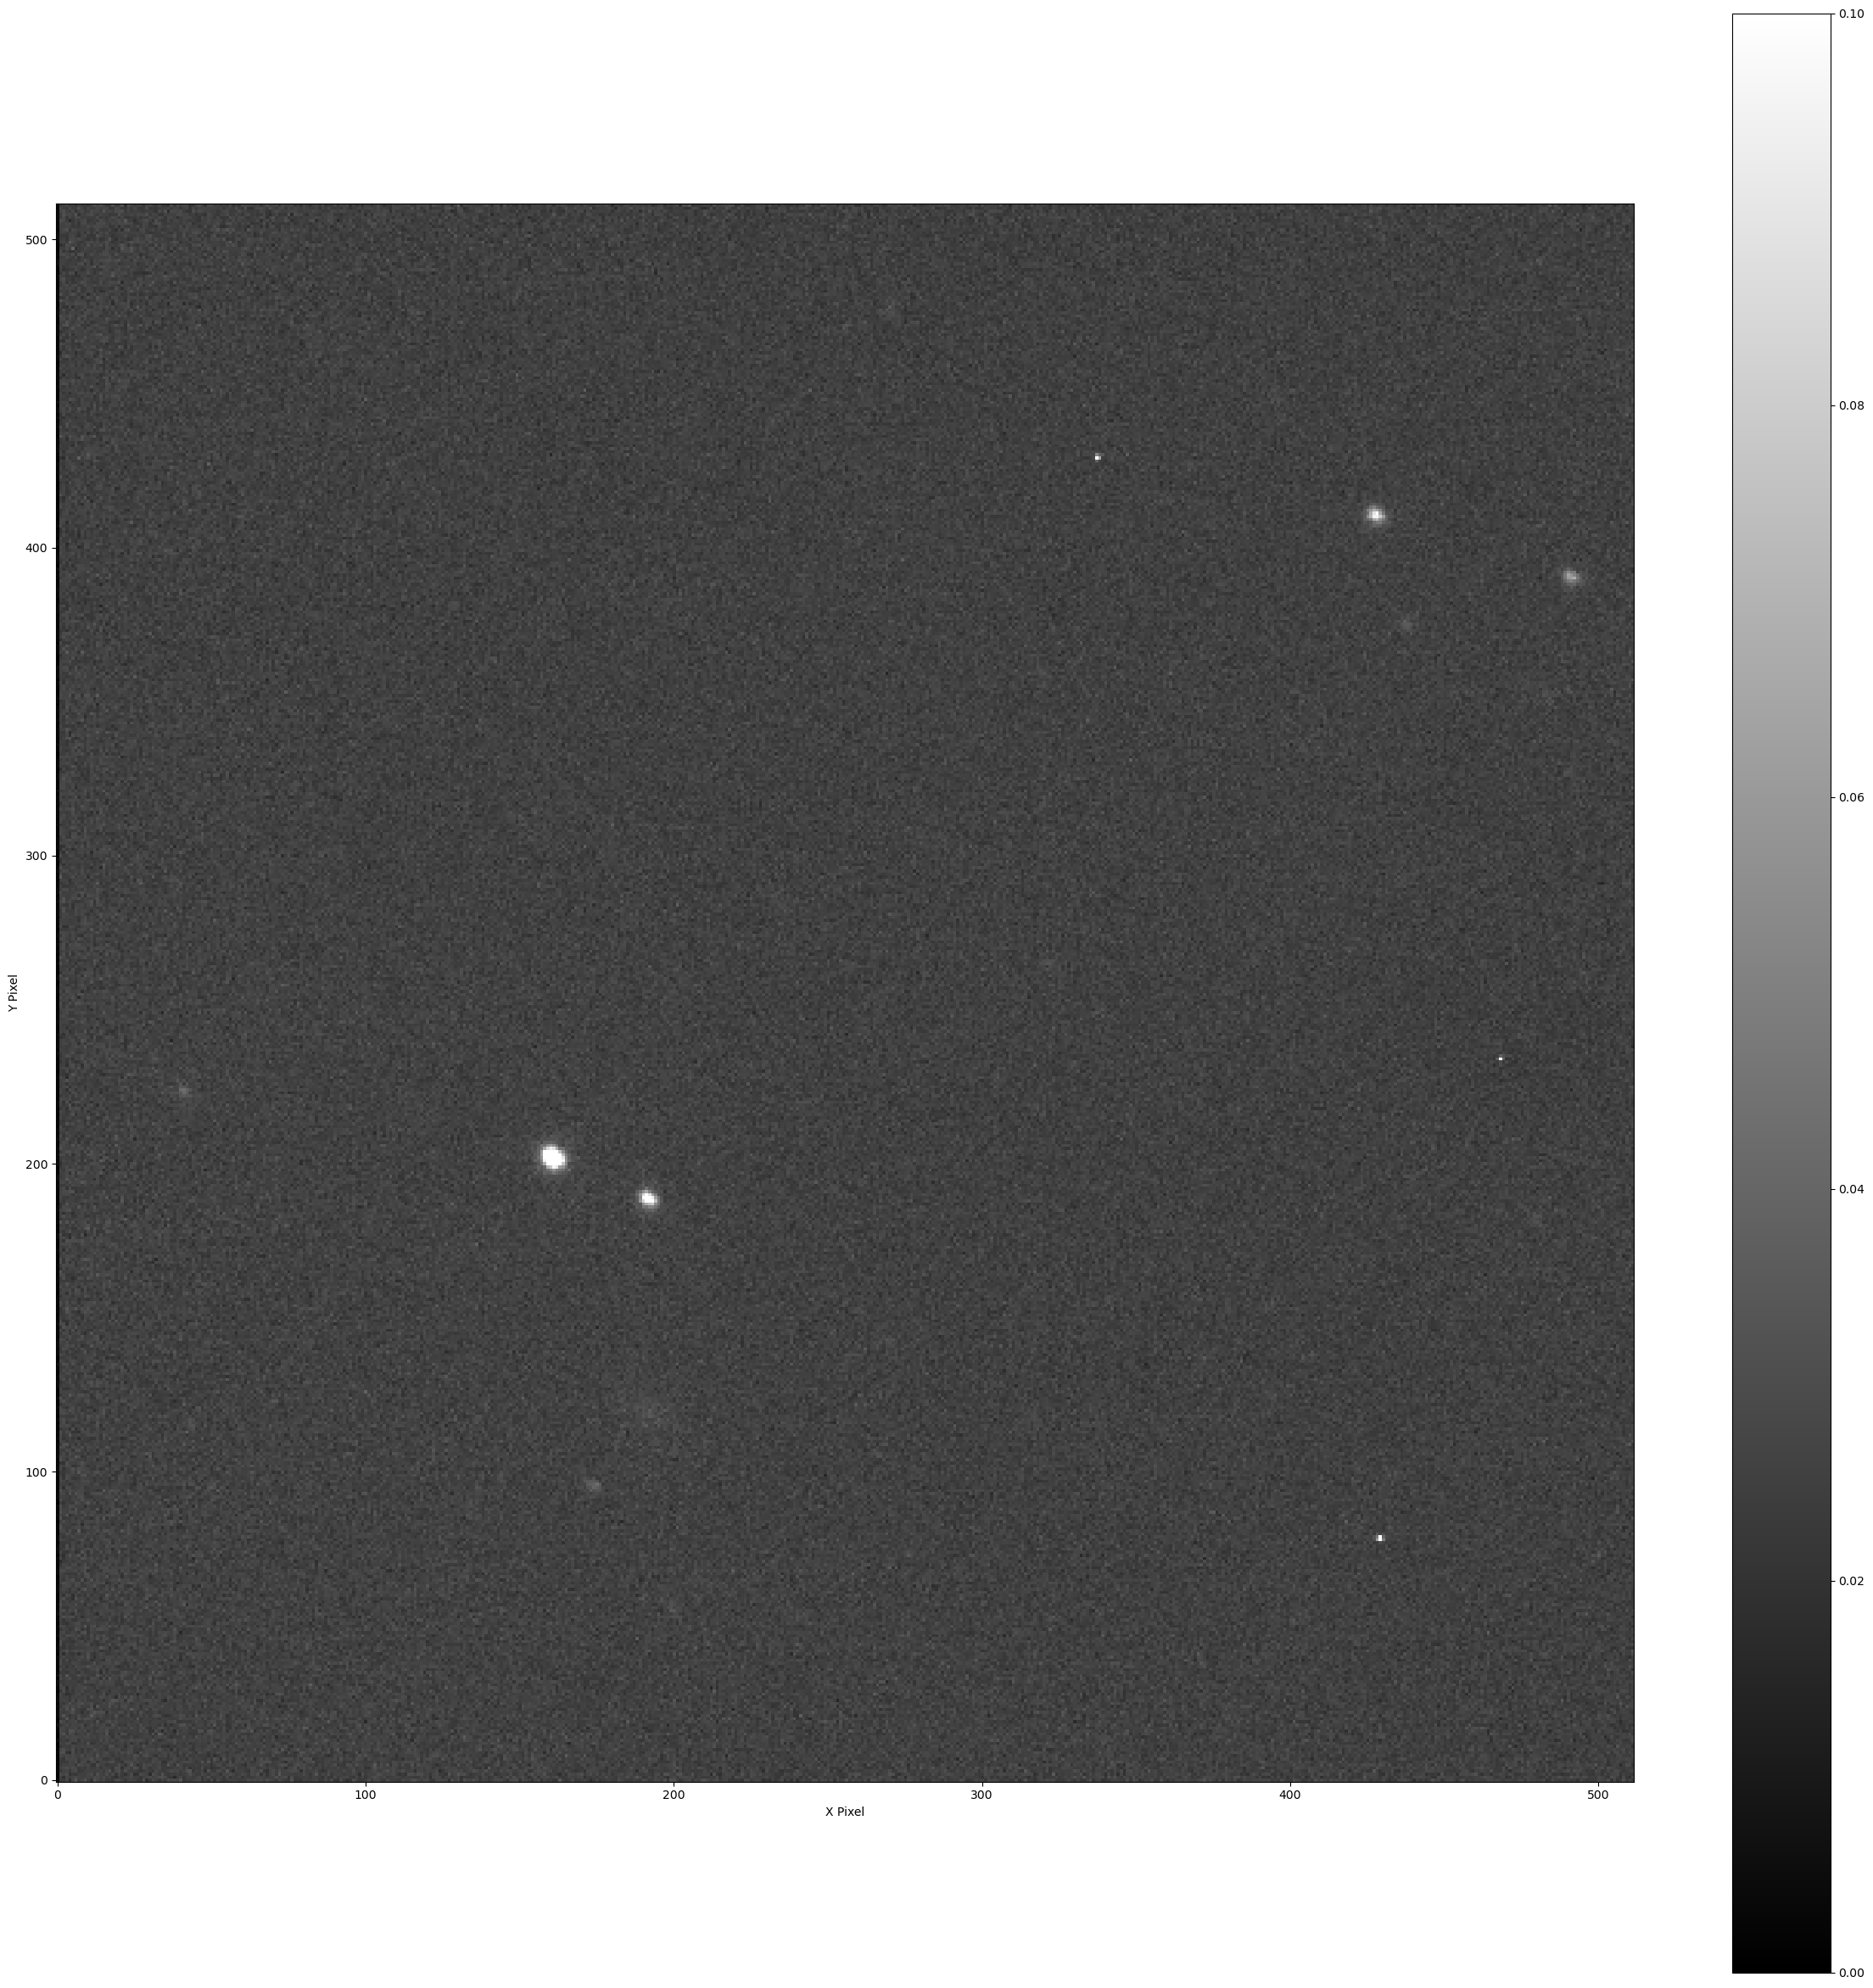

In [31]:
plt.figure(figsize=(30,30))
plt.imshow(a, cmap='gray', origin='lower', vmin=0, vmax=0.1)
plt.colorbar()
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()